# Application of Analytics

# Problem Statement
1. Fit a Decision Tree Regressor model on the data. 
2. The training and testing accuracy of your model. So do split the data before modelling.

- Lastly, a function where i can input my values and get a prediction of whatever we are trying to predict. Think this through !!.

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("hardware.csv")

In [4]:
df

,CATEGORY_ID,CATEGORY_NAME,PRODUCT_ID,PRODUCT_NAME,DESCRIPTION,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,DESCRIPTION - Detail 3,DESCRIPTION - Detail 4,STANDARD_COST,...,REGION_ID,LOCATION_ID,WAREHOUSE_ID,QUANTITY,WAREHOUSE_NAME,ADDRESS,POSTAL_CODE,CITY,STATE,COUNTRY_NAME
0,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,11,8,50,Beijing,40-5-12 Laogianggen,190518,Beijing,Shenzhen,China
1,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,12,9,36,Bombay,1298 Vileparle (E),490231,Bombay,Maharashtra,India
2,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,6,2,97,San Francisco,2011 Interiors Blvd,99236,South San Francisco,California,United States of America
3,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,8,4,67,"Seattle, Washington",2004 Charade Rd,98199,Seattle,Washington,United States of America
4,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,13,6,30,Sydney,12-98 Victoria Street,2901,Sydney,New South Wales,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,5,Storage,273,Western Digital WD101KRYZ,"Series:Gold,Type:7200RPM,Capacity:10TB,Cache:2...",Series:Gold,Type:7200RPM,Capacity:10TB,Cache:256MB,313.96,...,2,23,7,170,Mexico City,Mariano Escobedo 9991,11932,Monterrey,Nuevo León,Mexico
1108,5,Storage,273,Western Digital WD101KRYZ,"Series:Gold,Type:7200RPM,Capacity:10TB,Cache:2...",Series:Gold,Type:7200RPM,Capacity:10TB,Cache:256MB,313.96,...,3,11,8,156,Beijing,40-5-12 Laogianggen,190518,Beijing,Shenzhen,China
1109,5,Storage,273,Western Digital WD101KRYZ,"Series:Gold,Type:7200RPM,Capacity:10TB,Cache:2...",Series:Gold,Type:7200RPM,Capacity:10TB,Cache:256MB,313.96,...,2,6,2,264,San Francisco,2011 Interiors Blvd,99236,South San Francisco,California,United States of America
1110,5,Storage,273,Western Digital WD101KRYZ,"Series:Gold,Type:7200RPM,Capacity:10TB,Cache:2...",Series:Gold,Type:7200RPM,Capacity:10TB,Cache:256MB,313.96,...,2,9,5,199,Toronto,147 Spadina Ave,M5V 2L7,Toronto,Ontario,Canada


![](https://media.tenor.com/zuYC6pvC9FoAAAAM/let-us-begin.gif)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CATEGORY_ID             1112 non-null   int64  
 1   CATEGORY_NAME           1112 non-null   object 
 2   PRODUCT_ID              1112 non-null   int64  
 3   PRODUCT_NAME            1112 non-null   object 
 4   DESCRIPTION             1112 non-null   object 
 5   DESCRIPTION - Detail 1  1112 non-null   object 
 6   DESCRIPTION - Detail 2  1112 non-null   object 
 7   DESCRIPTION - Detail 3  794 non-null    object 
 8   DESCRIPTION - Detail 4  350 non-null    object 
 9   STANDARD_COST           1112 non-null   float64
 10  LIST_PRICE              1112 non-null   float64
 11  COUNTRY_ID              1112 non-null   object 
 12  REGION_ID               1112 non-null   int64  
 13  LOCATION_ID             1112 non-null   int64  
 14  WAREHOUSE_ID            1112 non-null   

In [8]:
hardware = df.dropna(axis=1)

## The Real game starts here

![](https://media.tenor.com/89pNY5CDNNQAAAAM/this-is-when-fun-begins-fun-begins.gif)

In [24]:
data = hardware.drop(['CATEGORY_ID','PRODUCT_NAME','DESCRIPTION','PRODUCT_ID','REGION_ID','COUNTRY_ID','LOCATION_ID','WAREHOUSE_ID','ADDRESS','POSTAL_CODE'],axis=1)

In [25]:
data

,CATEGORY_NAME,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,STANDARD_COST,LIST_PRICE,QUANTITY,WAREHOUSE_NAME,CITY,STATE,COUNTRY_NAME
0,CPU,Speed:3.6GHz,Cores:6,535.47,601.99,50,Beijing,Beijing,Shenzhen,China
1,CPU,Speed:3.6GHz,Cores:6,535.47,601.99,36,Bombay,Bombay,Maharashtra,India
2,CPU,Speed:3.6GHz,Cores:6,535.47,601.99,97,San Francisco,South San Francisco,California,United States of America
3,CPU,Speed:3.6GHz,Cores:6,535.47,601.99,67,"Seattle, Washington",Seattle,Washington,United States of America
4,CPU,Speed:3.6GHz,Cores:6,535.47,601.99,30,Sydney,Sydney,New South Wales,Australia
...,...,...,...,...,...,...,...,...,...,...
1107,Storage,Series:Gold,Type:7200RPM,313.96,443.64,170,Mexico City,Monterrey,Nuevo León,Mexico
1108,Storage,Series:Gold,Type:7200RPM,313.96,443.64,156,Beijing,Beijing,Shenzhen,China
1109,Storage,Series:Gold,Type:7200RPM,313.96,443.64,264,San Francisco,South San Francisco,California,United States of America
1110,Storage,Series:Gold,Type:7200RPM,313.96,443.64,199,Toronto,Toronto,Ontario,Canada


In [26]:
list_of_categorical_columns =  data.select_dtypes(include=['object']).columns

In [27]:
list_of_categorical_columns

Index(['CATEGORY_NAME', 'DESCRIPTION - Detail 1', 'DESCRIPTION - Detail 2',
       'WAREHOUSE_NAME', 'CITY', 'STATE', 'COUNTRY_NAME'],
      dtype='object')

## Convert categories into numbers - Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in list_of_categorical_columns:
    data[i]=le.fit_transform(data[i])

In [30]:
data

,CATEGORY_NAME,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,STANDARD_COST,LIST_PRICE,QUANTITY,WAREHOUSE_NAME,CITY,STATE,COUNTRY_NAME
0,0,71,7,535.47,601.99,50,0,0,6,2
1,0,71,7,535.47,601.99,36,1,1,1,3
2,0,71,7,535.47,601.99,97,4,5,0,5
3,0,71,7,535.47,601.99,67,5,3,8,5
4,0,71,7,535.47,601.99,30,7,7,3,0
...,...,...,...,...,...,...,...,...,...,...
1107,2,47,49,313.96,443.64,170,2,2,4,4
1108,2,47,49,313.96,443.64,156,0,0,6,2
1109,2,47,49,313.96,443.64,264,4,5,0,5
1110,2,47,49,313.96,443.64,199,8,8,5,1


In [32]:
x=data[['CATEGORY_NAME','DESCRIPTION - Detail 1','DESCRIPTION - Detail 2','STANDARD_COST','QUANTITY','WAREHOUSE_NAME','CITY','STATE','COUNTRY_NAME']]

In [33]:
y=data['LIST_PRICE']

# Train and Test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [36]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

889
223
889
223


# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(x_test)

In [41]:
len(y_test)

223

In [42]:
len(y_pred)

223

In [43]:
from sklearn.metrics import r2_score,mean_squared_error

In [44]:
mse = mean_squared_error(y_test,y_pred)

In [45]:
rsq = r2_score(y_test,y_pred)

In [46]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 5814.988590139142
r square : 0.9935516810689574


## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
clf = DecisionTreeRegressor(min_samples_split=200)

In [49]:
clf.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=200)

In [50]:
y_pred = clf.predict(x_test)

In [51]:
mse_tree= mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)

Mean Squared Error: 244042.7874958047
R-squared: 0.7293776759489845


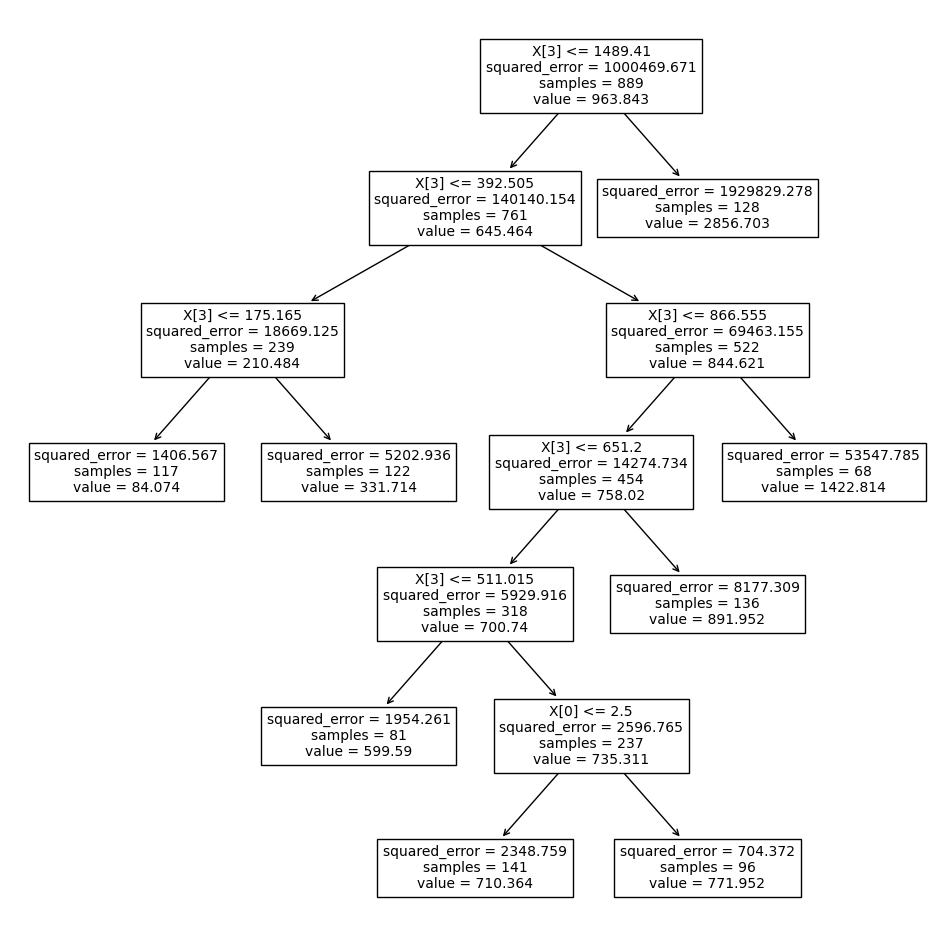

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
tree.plot_tree(clf,fontsize=10)
plt.show()

![](https://media.tenor.com/visJrdbmUQYAAAAM/i-cant-function-the-black-hokage.gif)

## Function

In [68]:
import pandas as pd
import numpy as np
import pickle

# Set path to saved model
model_path = 'clf.pkl'

with open(model_path, 'rb') as a:
    clf = pickle.load(a)

def predict_listprice(category, description, warehouse, cost, quantity):
    # Load saved Decision Tree Regressor model
    clf = pickle.load('dt_reg.pkl')

    # Load saved LabelEncoder object
    le = pickle.load('label_encoder.pkl')

    # Create dataframe from user input
    item_df = pd.DataFrame({
        'Category': [category],
        'Description': [description],
        'Warehouse': [warehouse],
        'Cost': [cost],
        'Quantity': [quantity]
    })

    # Split categorical and numerical columns into separate dataframes
    cat_cols = ['Category', 'Description', 'Warehouse']
    num_cols = ['Cost', 'Quantity']
    cat_df = item_df[cat_cols]
    num_df = item_df[num_cols]

    # Encode categorical columns using loaded LabelEncoder object
    cat_df_encoded = cat_df.apply(lambda col: le.transform(col))

    # Combine encoded categorical and numerical columns into single dataframe
    item_df_encoded = pd.concat([cat_df_encoded, num_df], axis=1)

    # Make prediction using Decision Tree Regressor model
    listprice_pred = dt_reg.predict(item_df_encoded)[0]

    # Convert encoded label back to original label using inverse_transform
    category_pred, description_pred, detail_pred = le.inverse_transform(cat_df_encoded[cat_cols].values)
    
    # Combine predicted list price, encoded categorical variables, and numerical variables into single dataframe
    item_df_pred = pd.DataFrame({
        'Category': [category_pred],
        'Description': [description_pred],
        'warehouse': [warehouse_pred],
        'Cost': [cost],
        'Quantity': [quantity],
        'ListPrice': [listprice_pred]
    })

    return item_df_pred

FileNotFoundError: [Errno 2] No such file or directory: 'clf.pkl'

![](https://media.tenor.com/7nSGImHak6wAAAAM/dead-or-alive-in-too-deep.gif)

![](https://media.tenor.com/6nzQjqcBjaUAAAAM/stuck-trapped.gif)